In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv("wine.csv",names=['class','alcohol','malicAcid','ash','ashalkalinity','magnesium','totalPhenols','flavanoids',
                              'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline'])

In [3]:
data.head(2)

,class,alcohol,malicAcid,ash,ashalkalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [4]:
data.shape

(178, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                178 non-null    int64  
 1   alcohol              178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalkalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.isnull().sum()

class                  0
alcohol                0
malicAcid              0
ash                    0
ashalkalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,class,alcohol,malicAcid,ash,ashalkalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### All the other attributes have continous values while the class column is the Dependent Variable

In [9]:
data["class"].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malicAcid'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'ashalkalinity'}>,
        <AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'totalPhenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>],
       [<AxesSubplot:title={'center':'nonFlavanoidPhenols'}>,
        <AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'colorIntensity'}>,
        <AxesSubplot:title={'center':'hue'}>],
       [<AxesSubplot:title={'center':'od280_od315'}>,
        <AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

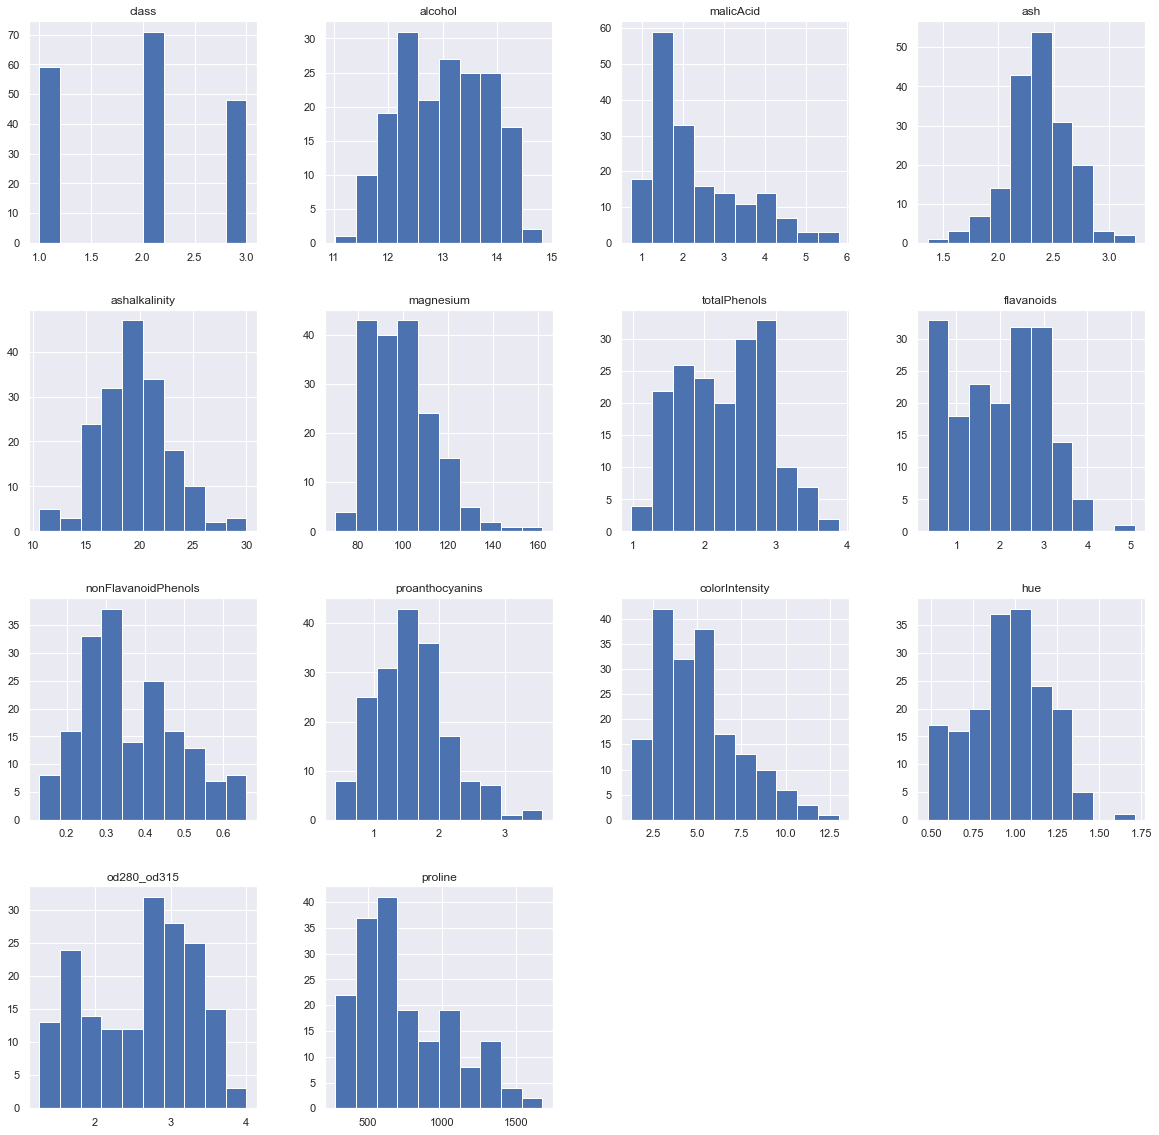

In [10]:
data.hist(figsize =(20,20))

Text(2158.1571972444563, 0.5, "{'fontsize': 30}")

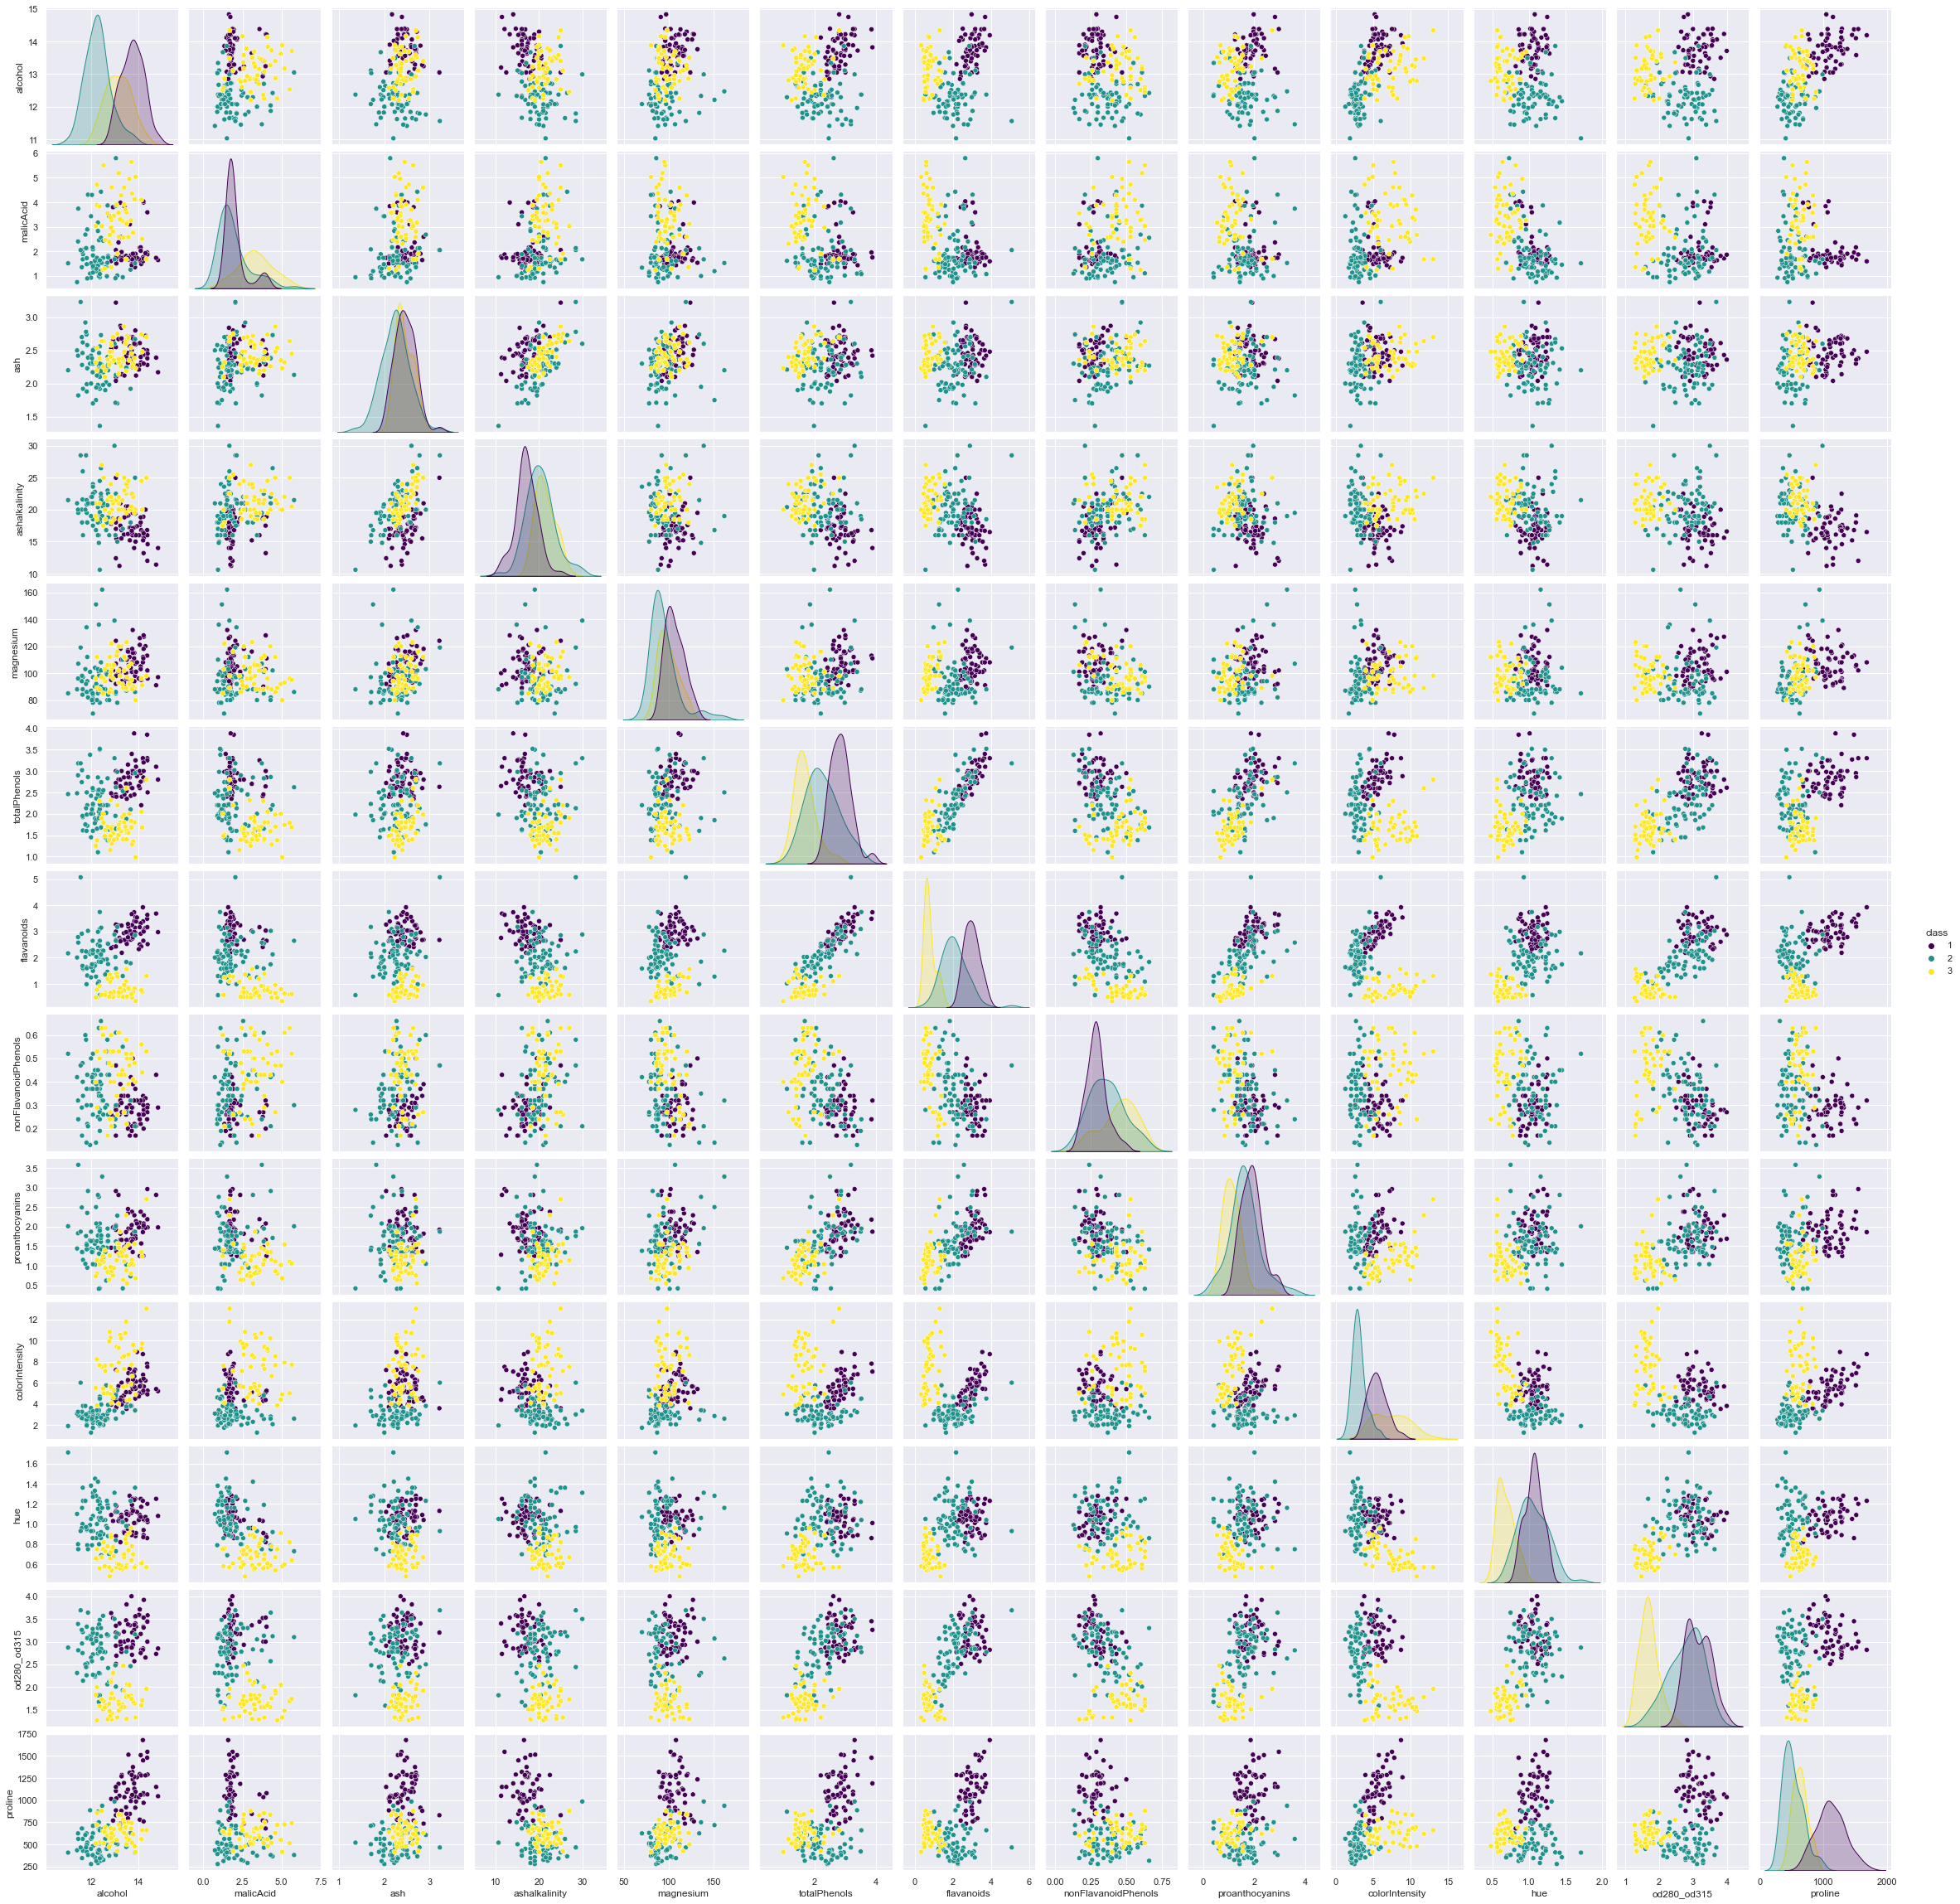

In [11]:
sns.pairplot(data,hue="class",palette="viridis")
plt.ylabel({"fontsize":30})

In [119]:
Average_content_per_class = pd.pivot_table(data, index = 'class', values = data.columns)
Average_content_per_class

,alcohol,ash,ashalkalinity,colorIntensity,flavanoids,hue,magnesium,malicAcid,nonFlavanoidPhenols,od280_od315,proanthocyanins,proline,totalPhenols
class,,,,,,,,,,,,,
1,13.744746,2.455593,17.037288,5.528305,2.982373,1.062034,106.338983,2.010678,0.290000,3.157797,1.899322,1115.711864,2.840169
2,12.278732,2.244789,20.238028,3.086620,2.080845,1.056282,94.549296,1.932676,0.363662,2.785352,1.630282,519.507042,2.258873
3,13.153750,2.437083,21.416667,7.396250,0.781458,0.682708,99.312500,3.333750,0.447500,1.683542,1.153542,629.895833,1.678750


<AxesSubplot:xlabel='class'>

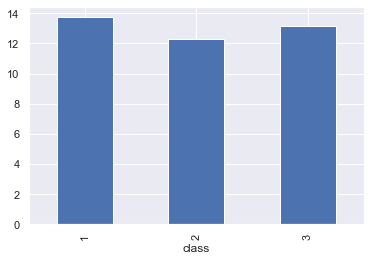

In [225]:
Average_content_per_class["alcohol"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

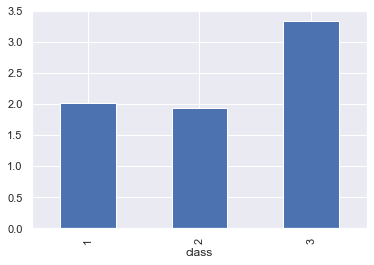

In [124]:
Average_content_per_class["malicAcid"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

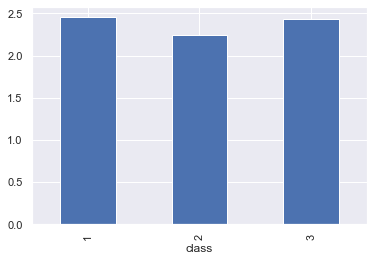

In [122]:
Average_content_per_class["ash"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

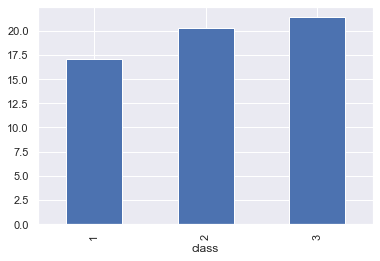

In [127]:
Average_content_per_class["ashalkalinity"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

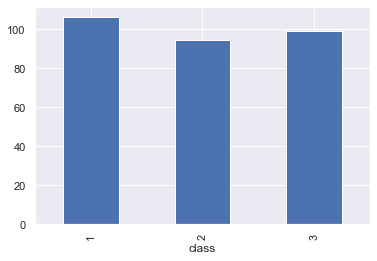

In [126]:
Average_content_per_class["magnesium"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

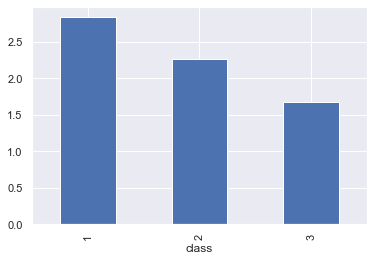

In [128]:
Average_content_per_class["totalPhenols"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

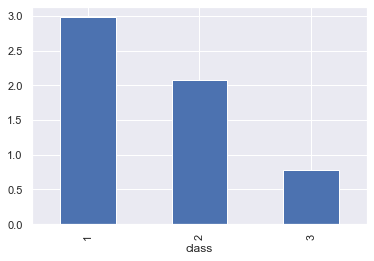

In [129]:
Average_content_per_class["flavanoids"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

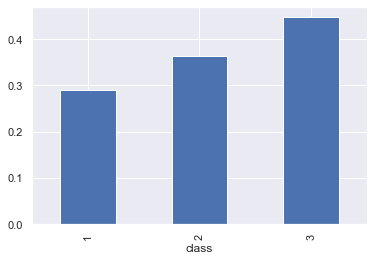

In [130]:
Average_content_per_class["nonFlavanoidPhenols"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

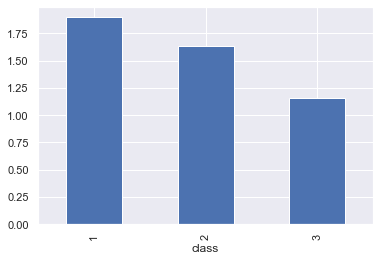

In [133]:
Average_content_per_class["proanthocyanins"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

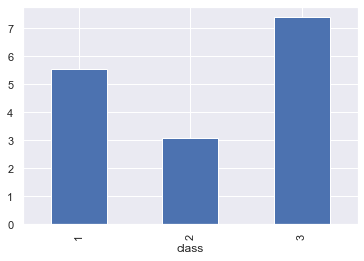

In [134]:
Average_content_per_class["colorIntensity"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

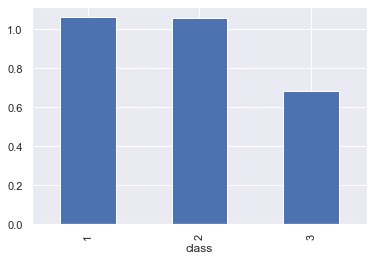

In [135]:
Average_content_per_class["hue"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

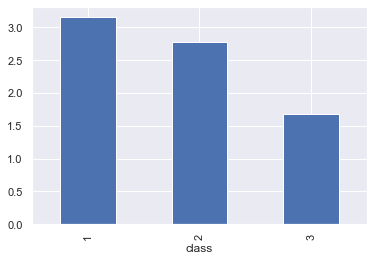

In [138]:
Average_content_per_class["od280_od315"].plot(kind="bar")

<AxesSubplot:xlabel='class'>

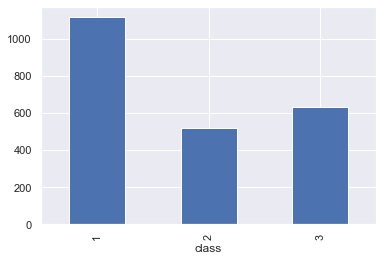

In [137]:
Average_content_per_class["proline"].plot(kind="bar")

The classes have a monotonic relationship in most of attributes. Their relationship on an average count:
1. Class 1 has the highest alcohol content,followed closely by class 3 with class 2 hving the lowest alcohol content
2. Class 3 has the highest MalicAcid content while class 1 and 2 have similar content with each other
3. Class 1 and 3 has the highest ash content with their values approximately the same
4. Class 3 has the highest ash alkalinity,foloowed by class 2. Class 1 has the lowest ashalkalinity value
5. Class 1 has the highest magnesium content,followed by class 3 and then class 2
6. Class 1 has the highest total phenol content,folowed by class 2 and then class 3
7. Class 1 has the highest flavanoids content,folowed by class 2 and then class 3
8. Class 3 has the highest nonflavanoids phenols,foloowed by class 2. Class 1 has the lowest ashalkalinity value
9. Class 1 has the highest proanthocyanins content,folowed by class 2 and then class 3
10. Class 3 has the highest color intensity,followed by class 1, with class 2 hving the lowest color intensity
11. Class 1 and 2 have almost the same hue value and they have higher hue value than class 3
12. Class 1 has the highest pprotein content,folowed by class 2 and then class 3
13. Class 1 has the highest proline content,folowed by class 3 and then class 2

## Feature engineering

### Feature Correlation

<AxesSubplot:>

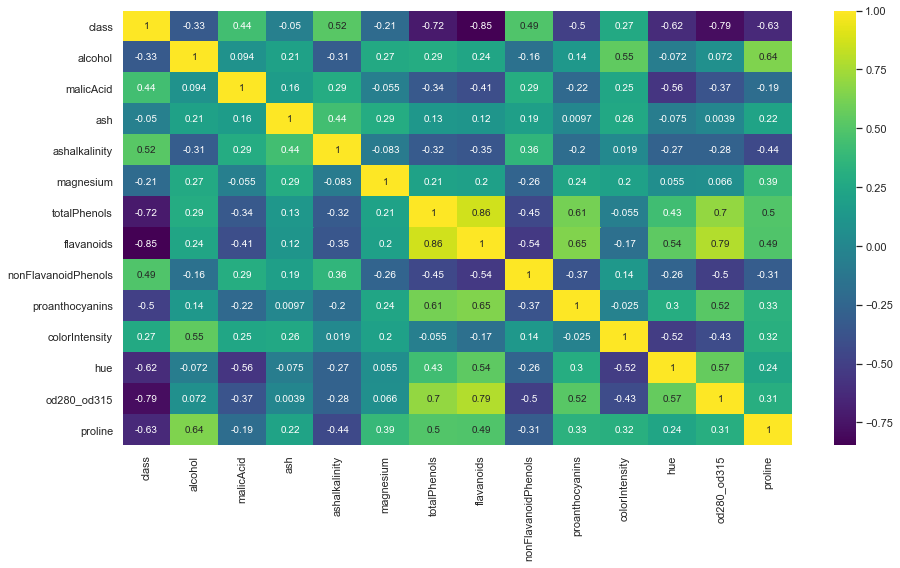

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="viridis")

Ash is the least correlated to the class of wine and this is correct in real life as ash is just the inorganic matter left after evaporation and incineration of wine. so i will be removing this

In [139]:
data=data.drop(columns="ash")

### Splitting the data to avoid data leakage

In [157]:
X=data.iloc[:,1:].values
y=np.ravel(data.iloc[:,:1].values)


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=30)

### Feature scaling

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(X_train)


array([[0.76612903, 0.22727273, 0.21052632, ..., 0.32520325, 0.83763838,
        0.58273894],
       [0.60752688, 0.243083  , 0.31578947, ..., 0.4796748 , 0.57195572,
        0.70756063],
       [0.57258065, 0.3201581 , 0.42105263, ..., 0.44715447, 0.69372694,
        0.64693295],
       ...,
       [0.72043011, 0.97035573, 0.53216374, ..., 0.1300813 , 0.16605166,
        0.32952924],
       [0.72580645, 0.71541502, 0.64912281, ..., 0.24390244, 0.1697417 ,
        0.17261056],
       [0.54301075, 0.1798419 , 0.38596491, ..., 0.5203252 , 0.4501845 ,
        0.58987161]])

In [176]:
scaling.transform(X_test)

array([[ 0.52688172,  0.18379447,  1.0877193 ,  0.72619048,  0.8       ,
         0.53797468,  0.1509434 ,  0.48895899,  0.17662116,  0.67479675,
         0.81549815,  0.5042796 ],
       [ 0.66397849,  0.21146245,  0.50292398,  0.21428571,  0.53448276,
         0.47890295,  0.28301887,  0.39432177,  0.19112628,  0.5203252 ,
         0.93357934,  0.40442225],
       [ 0.63709677,  0.76284585,  0.79532164,  0.4047619 ,  0.34482759,
         0.13080169,  0.26415094,  0.22082019,  0.61604096,  0.15447154,
         0.23247232,  0.2510699 ],
       [ 0.19623656,  0.38339921,  0.50292398,  0.29761905,  0.26551724,
         0.35654008,  0.88679245,  0.20189274,  0.21501706,  0.6097561 ,
         0.44649446,  0.23466476],
       [ 0.57526882,  0.36561265,  0.50292398,  0.5       ,  0.23103448,
         0.07172996,  0.75471698,  0.33123028,  0.68430034,  0.09756098,
         0.12177122,  0.40085592],
       [ 0.28225806,  0.11660079,  0.71345029, -0.0952381 ,  0.42068966,
         0.26371308,  

### Model Creation

In [177]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=3,multi_class="ovr",max_iter=2000)

In [178]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='ovr', random_state=3)

In [190]:
ypred=LR.predict(X_test)
ypred

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2], dtype=int64)

In [183]:
np.round(LR.predict_proba(X_test),3)

array([[0.946, 0.048, 0.006],
       [0.676, 0.323, 0.001],
       [0.01 , 0.   , 0.99 ],
       [0.006, 0.958, 0.037],
       [0.02 , 0.   , 0.98 ],
       [0.007, 0.992, 0.001],
       [0.003, 0.   , 0.997],
       [0.   , 0.004, 0.995],
       [0.883, 0.107, 0.011],
       [0.931, 0.064, 0.004],
       [0.   , 0.988, 0.012],
       [0.   , 0.998, 0.002],
       [0.999, 0.   , 0.001],
       [0.001, 0.999, 0.001],
       [0.017, 0.961, 0.022],
       [0.   , 0.   , 1.   ],
       [0.998, 0.001, 0.001],
       [0.002, 0.047, 0.95 ],
       [0.984, 0.016, 0.   ],
       [0.001, 0.999, 0.   ],
       [0.966, 0.031, 0.003],
       [0.   , 0.996, 0.004],
       [0.991, 0.   , 0.009],
       [0.002, 0.998, 0.   ],
       [0.   , 0.994, 0.006],
       [0.058, 0.844, 0.098],
       [0.001, 0.   , 0.999],
       [0.   , 0.998, 0.002],
       [0.161, 0.838, 0.001],
       [0.   , 0.989, 0.011],
       [0.998, 0.001, 0.002],
       [0.004, 0.   , 0.996],
       [0.029, 0.   , 0.971],
       [0.

In [186]:
LR.coef_

array([[ 1.18233427e+00,  7.47706647e-01, -6.14095571e-02,
        -1.10017793e-02,  3.96333705e-01,  1.37506291e+00,
         8.51923912e-02, -2.58990731e-01, -1.57182306e-01,
         9.98453057e-02,  8.97705551e-01,  1.56363338e-02],
       [-1.07354467e+00, -1.01111684e+00, -8.18955183e-02,
        -3.28508978e-02, -2.81086167e-03,  6.08864139e-01,
         8.69298692e-02,  1.03474808e+00, -1.78732533e+00,
         3.72025972e-01,  1.34527088e-01, -1.39657708e-02],
       [ 3.37777107e-01,  5.40883838e-01,  1.96837611e-01,
         3.87539484e-02, -5.54248247e-01, -1.92577896e+00,
        -3.38503111e-02, -7.04790648e-01,  1.01369298e+00,
        -4.54794395e-01, -1.01280386e+00, -7.50696522e-04]])

In [200]:
LR.intercept_

array([-33.26693717,  34.66144339, -11.34938614])

In [195]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [199]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test,ypred))

[[14  0  0]
 [ 1 19  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        11

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


#### Without penalizing the model, the accuracy score is 0.977%. This is a good score

## Performing Hypertuning and Pnalizing the model using L1 regularization.

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [227]:
solve_lib = ['newton-cg', 'lbfgs', 'liblinear']
penalties = ['l1',"l2"]
C_val = [100, 10, 1.0, 0.1, 0.01]
StratK=StratifiedKFold(n_splits=10,random_state=30,shuffle=True)

In [209]:
grid = dict(solver=solve_lib,penalty=penalties,C=C_val)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=StratK, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [210]:
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=30, shuffle=True),
             error_score=0,
             estimator=LogisticRegression(max_iter=2000, multi_class='ovr',
                                          random_state=3),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [212]:
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.966667 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


#### After hypertuning and penalizing the model,the best score is 0.966%,which means the model is a good one.